In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### Create a function that plots the distribution of the digits of a given array compared to the distribution of Benford's law

In [4]:
b= np.array([0,30.1, 17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6])
def benford(n):
    return b*n/100
benford(5674)

array([   0.   , 1707.874,  998.624,  709.25 ,  550.378,  448.246,
        380.158,  329.092,  289.374,  261.004])

In [140]:
def Benf(w):
    # extract the first digit
    if type(w) is not np.ndarray: w = w.to_numpy()
    for j in range(len(w)):
        w[j]=int(str(w[j])[0])
    
    # count the frequency of each digit
    count = pd.Series(w).value_counts(normalize=True).sort_index()
    
    # it might be that a digit is missing. put zero instead.
    c = pd.DataFrame(count)
    c.index= [int(x) for x in c.index]
    z = pd.DataFrame({'a': np.zeros(10)},np.arange(0,10))
    join_df = c.join(z,how='outer').fillna(0)
    c = list((join_df[0]+join_df['a'])*100)
    # print('Percentages:\n', c)
    # plot this distribution and the one according to Benford's law
    RMSE = mean_squared_error(b,c, squared= False)
    
    return c, RMSE

def Benf_print(w, name= 'Given'):
    c, RMSE = Benf(w)
    fig = plt.figure()
    ax = fig.gca()
    ax.set_xticks(np.arange(0, 10))
    plt.scatter(np.arange(0,10), c, label = 'Naive')
    plt.scatter(np.arange(0,10), b, color = 'r', label = 'Benford')
    plt.title('Comparing '+name+' and Benford distributions')
    plt.ylabel('Percentage')
    plt.xlabel('Digit')
    ax.legend([name,'Benford'])
    ax.grid(b= True)
    plt.show()
    
    
  #  print('Frequency of the given array: \n', count, '\n')
  #  print('Frequency according to Benford distribution: \n', pd.Series(benford(len(w))), '\n')
    print('Root mean squared error: \n', RMSE,'\n\n')

### Let's try it on a random array of length 5674

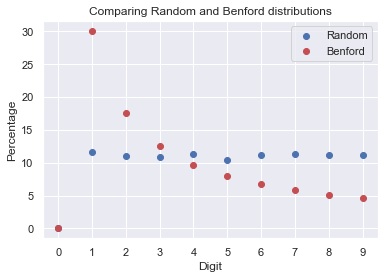

Root mean squared error: 
 7.2406991031187395 




In [131]:
w = np.random.rand(5674)*1000000
Benf_print(w, 'Random')

# ---------> for con tanti vettori e vedere un errore medio

### Now it's time to take some real dataset and see whether Benford's law holds

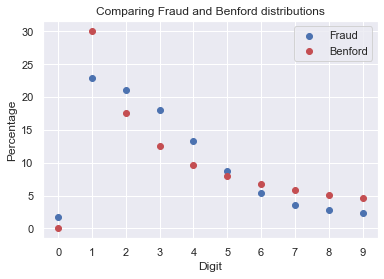

Root mean squared error: 
 3.5973168792486505 




In [134]:
# we take the Fraud Detection on Bank Payments dataset from 
# https://www.kaggle.com/turkayavci/fraud-detection-on-bank-payments/data

df = pd.read_csv('fraud_detection_bank_dataset.csv')

# and consider the column with the amount of the purchase 
amount = df['amount']
Benf_print(amount, 'Fraud')

Percentages:
 [0.0, 16.666666666666664, 19.696969696969695, 20.909090909090907, 17.87878787878788, 10.0, 7.2727272727272725, 3.3333333333333335, 1.8181818181818181, 2.4242424242424243]


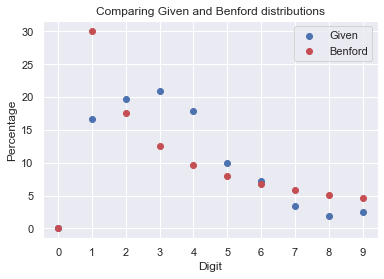

Mean squared error: 
 5.905792241675671


In [77]:
# Consider the MusicNet dataset, a collection of 330 freely-licensed classical music recordings
# https://www.kaggle.com/imsparsh/musicnet-dataset?select=musicnet_metadata.csv

df_1 = pd.read_csv('musicnet_metadata.csv')

# and consider the column with the duration of the recording, in seconds
sec = df_1['seconds']
Benf_print(sec)

# NOPE... it looks more like a gaussian-------> but low error

VIEWS
Percentages:
 [0.0, 29.942123128769932, 17.971134826247283, 12.918508388483236, 9.619282522161713, 7.8707660748736235, 6.454370070087181, 5.504407922049379, 5.035532003223522, 4.68387506410413]


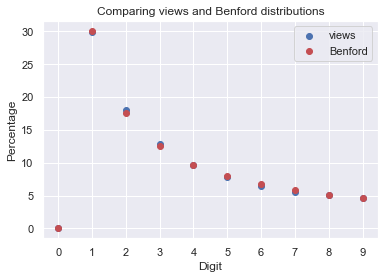

Mean squared error: 
 0.2245184309948041
LIKES
Percentages:
 [0.42003467728149646, 31.673545141517494, 17.052919485213312, 12.364160296954749, 9.677892012014945, 7.91228113018633, 6.183301179515984, 5.360326259493516, 4.994016947910816, 4.361522869911353]


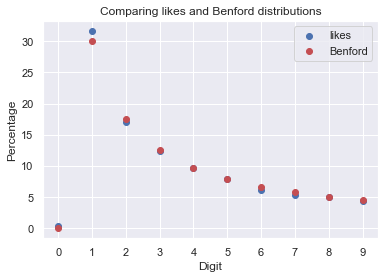

Mean squared error: 
 0.5915451770129108
DISLIKES
Percentages:
 [0.935309775574495, 30.30110625412098, 17.50958509365308, 12.198100075703925, 9.34332950743608, 7.814598647097609, 6.561820801484773, 5.653373708759676, 5.235781093555398, 4.446995042613984]


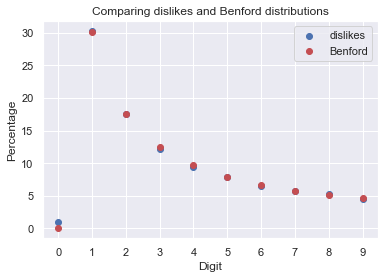

Mean squared error: 
 0.35092927139123486
COMMENT_COUNT
Percentages:
 [1.8559671786856822, 29.98119612200542, 17.121297223375418, 12.000293047449267, 9.57288334269457, 7.694937605313927, 6.508095435785978, 5.917116413099221, 4.906102713130968, 4.442110918459547]


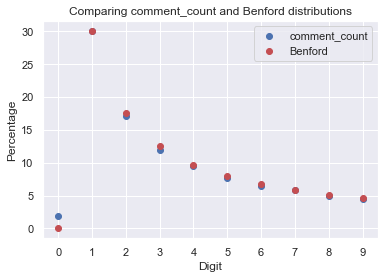

Mean squared error: 
 0.6410046710241527


In [80]:
# Trending YouTube Video Statistics
# https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv

dfYT = pd.read_csv('USvideos.csv')

attr = ['views', 'likes', 'dislikes', 'comment_count']

dfYT_copy= dfYT.copy()
for col in attr:
    print(col.upper())
    Benf_print(dfYT_copy[col],col)
    
# WOW!! I don't need to explain the results... it fits perfectly :) 
# we could try to study the outliars and see what they have in common

### Let's study in more detail the YouTube dataframe

In [11]:
# missing values?

dfYT.isnull().sum() # only a large amount in the 'description' column has NaN values
dfYT.drop(['description'], axis=1, inplace= True)
dfYT.isnull().sum() 

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [12]:
# I'm courious about how old are the videos -- I suppose the oldest have more chances to have highest views/likes/etc..

dfYT['publish_time'] = pd.to_datetime(dfYT['publish_time'])
dates = dfYT['publish_time'].copy()
print('Oldest video: ', min(dates))
print('Most recent video: ', max(dates))

Oldest video:  2006-07-23 08:24:11+00:00
Most recent video:  2018-06-14 01:31:53+00:00


In [13]:
# how many days later after the publication a video goes in the trends?

# dfYT['trending_date'] = pd.to_datetime(dfYT['trending_date'])
# it looks the dates have a strange format... convert it to timedate accordingly
dfYT['trending_date'] = pd.to_datetime(dfYT['trending_date'], format = '%y.%d.%m')
# don't consider timezone of the published time, as I don't know the one of the trending date
dfYT['publish_time'] = dfYT['publish_time'].apply(lambda x: x.replace(tzinfo=None))
# calculate the delta
diff = dfYT['trending_date']-dfYT['publish_time']

print ('Minimum time: ', diff.min())
print ('Maximum time: ', diff.max())
print ('Mean time: ', diff.mean())
print ('Median time: ', diff.median())
# mean value and mean are quite different.. the most of the videos are viral in very short time!
dfYT['trending_time'] = diff

Minimum time:  -1 days +10:59:56
Maximum time:  4214 days 15:35:49
Mean time:  16 days 05:21:53.236220664
Median time:  4 days 18:59:55


In [14]:
# erase some useless column
droppable = ['video_id', 
             'tags',
             'thumbnail_link']
dfYT.drop(droppable, axis = 1, inplace= True)

In [87]:
dfYT.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [23]:
dfYT.describe()

,category_id,views,likes,dislikes,comment_count,trending_time
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,16 days 05:21:53.236220664
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,146 days 00:18:47.135218340
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1 days +10:59:56
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,2 days 10:00:01
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,4 days 18:59:55
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,8 days 02:04:49
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,4214 days 15:35:49


### Benfordness per channel:

In [155]:
dfYT.channel_title.value_counts()

# there are 2207 different channels

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Netflix                                   193
Vox                                       193
                                         ... 
yeokm1                                      1
misleadingsilhouette                        1
BillyCrammer                                1
Absolut                                     1
Check It Out                                1
Name: channel_title, Length: 2207, dtype: int64

In [150]:
# create a dictionary with {'channel title': mean squared error, ....}
RMSE_dict = {}

# lets' consider videos with at least 100 videos
n_videos = 100

for channel in dfYT.channel_title.unique():
    if dfYT.channel_title.value_counts()[channel]< n_videos: continue
    df_ch = dfYT[dfYT['channel_title']==channel]
    c, rmse = Benf(df_ch['views'])
    RMSE_dict[channel] = rmse
     

{'Good Mythical Morning': 5.77546612644735,
 'Saturday Night Live': 5.248591647834138,
 'CrazyRussianHacker': 8.879601951261918,
 '20th Century Fox': 8.163876906556386,
 'Vox': 10.079722056992514,
 'NFL': 5.007954793152435,
 'TED-Ed': 7.584616326244788,
 'SciShow': 8.339951117152207,
 'Life Noggin': 7.617701598770997,
 'Tom Scott': 6.527240197960768,
 'HellthyJunkFood': 7.712489193204698,
 'Screen Junkies': 9.842158370557563,
 'FBE': 7.272479697304424,
 'WWE': 4.086308092909254,
 'The Graham Norton Show': 6.309175744696781,
 'Safiya Nygaard': 11.666399783510782,
 'INSIDER': 2.4023110145782747,
 'The Late Late Show with James Corden': 3.3719742466836973,
 'Bon Appétit': 4.69003715220907,
 'ABC News': 4.133468283443657,
 'CinemaSins': 7.961256923549474,
 'IISuperwomanII': 12.757346556257792,
 'Late Night with Seth Meyers': 4.302526113393556,
 'TheEllenShow': 2.7603895151183235,
 'Marques Brownlee': 10.163200236798172,
 'Vogue': 4.47505102011732,
 'The Late Show with Stephen Colbert': 3.2

In [151]:
# Channel with higher error:

ch_max = max(RMSE_dict, key=RMSE_dict.get)
ch_max

'jacksfilms'

VIEWS


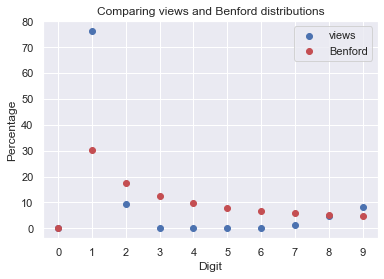

Root mean squared error: 
 16.110028862446768 


LIKES


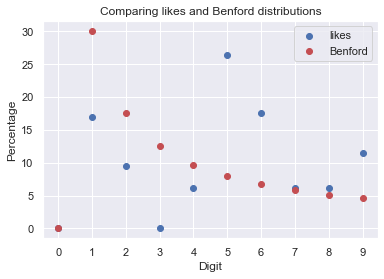

Root mean squared error: 
 9.576485308015588 


DISLIKES


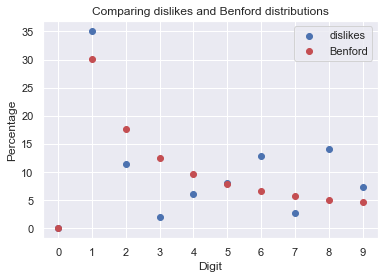

Root mean squared error: 
 5.687293001073396 


COMMENT_COUNT


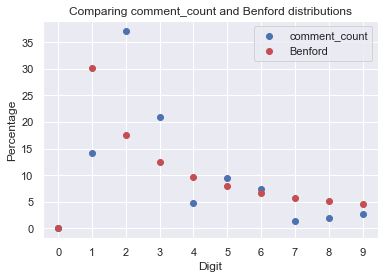

Root mean squared error: 
 8.761686050055493 




In [154]:
for col in attr:
    print(col.upper())
    Benf_print(dfYT[dfYT['channel_title']==ch_max][col],col)

In [156]:
# it looks that there are a high number of views starting with 1... maybe this is the reason

# I'll look at the second highest

# would also like to find a treshold for the RMSE to accept

In [160]:
x = sorted(((v,k) for k,v in RMSE_dict.items()))

ch_sec = x[-2][1]
ch_third = x[-3][1]

Dude Perfect
VIEWS


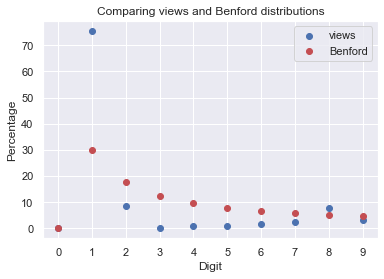

Root mean squared error: 
 15.771444873536034 


LIKES


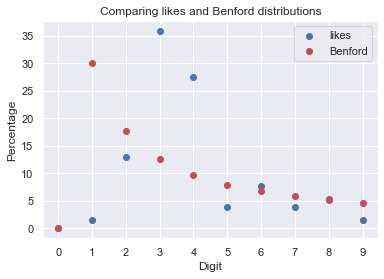

Root mean squared error: 
 13.15853617604822 


DISLIKES


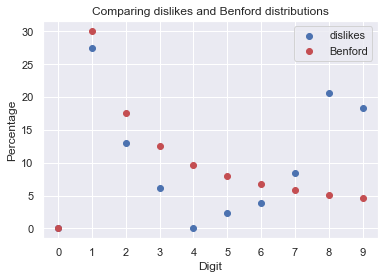

Root mean squared error: 
 7.990980806858412 


COMMENT_COUNT


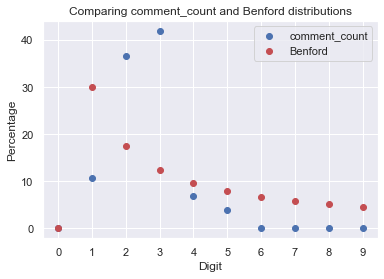

Root mean squared error: 
 13.263338331578506 




In [163]:
print('Channel name: ', ch_sec)
for col in attr:
    print(col.upper())
    Benf_print(dfYT[dfYT['channel_title']==ch_sec][col],col)

Cannel name:  Smosh
VIEWS


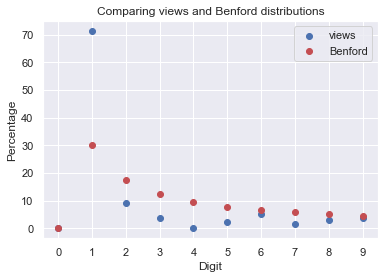

Root mean squared error: 
 14.175956993619355 


LIKES


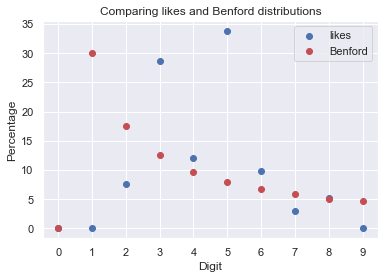

Root mean squared error: 
 14.079773524451971 


DISLIKES


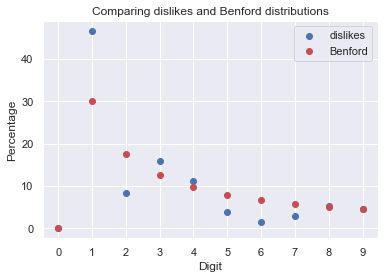

Root mean squared error: 
 6.5201356605213014 


COMMENT_COUNT


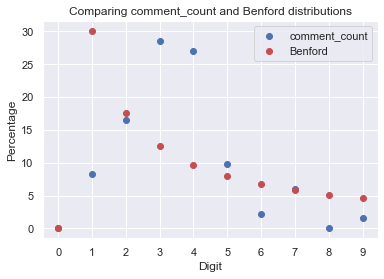

Root mean squared error: 
 10.471273270704687 




In [164]:
print('Cannel name: ', ch_third)

for col in attr:
    print(col.upper())
    Benf_print(dfYT[dfYT['channel_title']==ch_third][col],col)